# Action Group Invocation Types 
Amazon Bedrock Agents provide two methods to invoke action groups:
1. **Lambda Function Invocation** – Calls an AWS Lambda function to execute business logic.
2. **Return Control Invocation** – Returns control to the application, allowing local execution.

Both methods allow agents to **process user input, execute actions, and return responses**.

## Implementing Lambda Functions

### **How It Works**
- The agent **interprets user input** and selects an appropriate action from action groups.
- The action is **mapped to a Lambda function** for execution.
- The Lambda function processes the **business logic** and **returns results** to the agent.

### **Processing an Action**
To process an action, the Lambda function:
- **Retrieves the action group, function, and parameters** from the incoming event.
- **Executes business logic** based on function type (function details vs. API schema).
- **Returns the response** to the agent.

### **Examples**
#### **Using Function Definitions**

In [ ]:
def lambda_handler(event, context):
    action_group = event['actionGroup']
    function = event['function']
    parameters = event.get('parameters', [])

    # Expected response body
    responseBody = {
        "TEXT": {
            "body": "sample response"
        }
    }

    # Business logic processing
    # ...

    # Return response to agent
    action_response = {
        'actionGroup': action_group,
        'function': function,
        'functionResponse': {
            'responseBody': responseBody
        }
    }

    return {'response': action_response, 'messageVersion': event['messageVersion']}

#### **Using API Schema**

In [ ]:
def get_named_parameter(event, name):
    return next(item for item in event['parameters'] if item['name'] == name)['value']

def get_named_property(event, name):
    return next(
        item for item in
        event['requestBody']['content']['application/json']['properties']
        if item['name'] == name)['value']

def lambda_handler(event, context):
    action_group = event['actionGroup']
    api_path = event['apiPath']
    http_method = event['httpMethod']

    # getting parameters according to the http metho
    if http_method == "get":
        claim_id = get_named_parameter(event, "claim_id")
    elif http_method == "post":
        claim_id = get_named_property(event, "claim_id")

    # Expected response body
    response_body = {
        'application/json': {'body': "sample response"}
    }

    # Business logic processing
    # ...

    # Lastly, return the response to the agent
    action_response = {
        'actionGroup': event['actionGroup'],
        'apiPath': event['apiPath'],
        'httpMethod': event['httpMethod'],
        'httpStatusCode': 200,
        'responseBody': response_body
    }

    api_response = {
        'messageVersion': '1.0',
        'response': action_response
    }

    return api_response

#### IAM Policy for Lambda Invocation
Your agent must have permission to invoke the Lambda function. Example IAM policy:

In [ ]:
{
  "Version": "2012-10-17",
  "Id": "bedrock-resource-based-policy",
  "Statement": [
    {
      "Sid": "agentsInvokeFunction",
      "Effect": "Allow",
      "Principal": {
        "Service": "bedrock.amazonaws.com"
      },
      "Action": "lambda:InvokeFunction",
      "Resource": "arn:aws:lambda:us-east-1:123456789012:function:$LAMBDA_FUNCTION_NAME",
      "Condition": {
        "ArnLike": {
          "AWS:SourceArn": "arn:aws:bedrock:us-east-1:123456789012:agent/$AGENT_ID"
        }
      }
    }
  ]
}

#### **Quick create Lambda function**
- This will create a skeleton Lambda function with all required permissions for the agent and the response body needed to return the response.

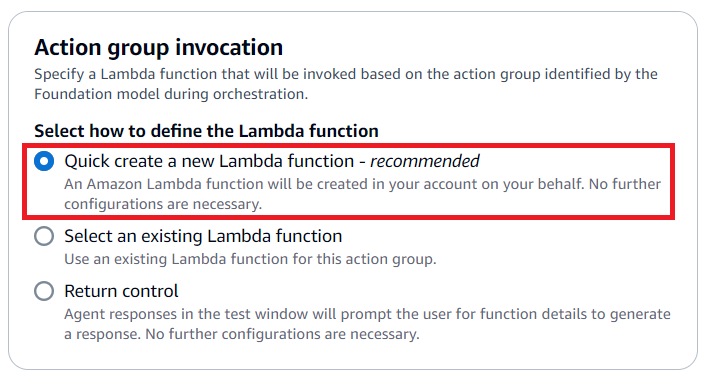

#### **Agent action group with Lambda function flow**

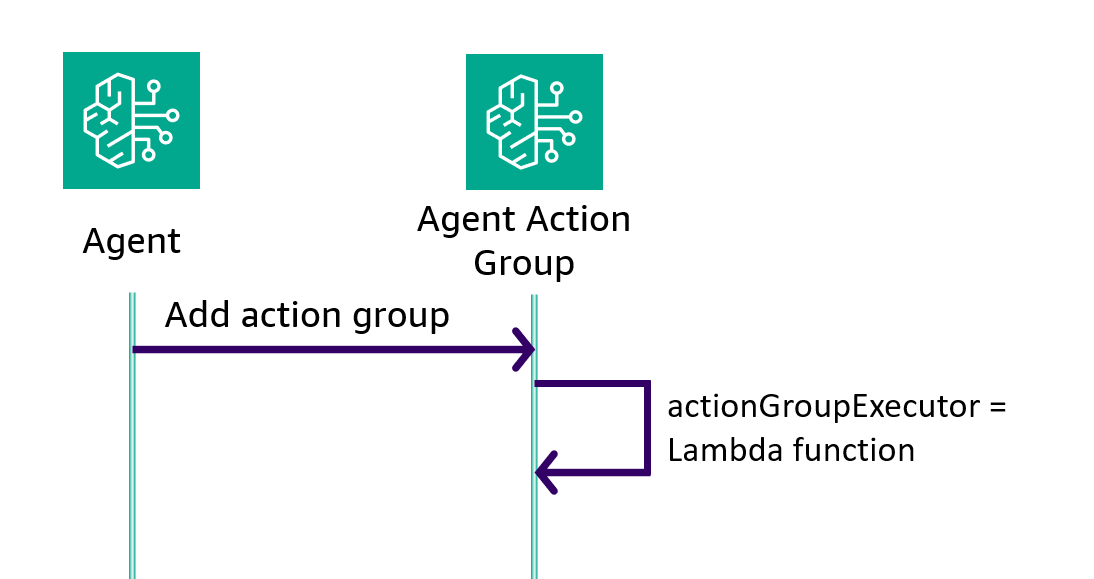

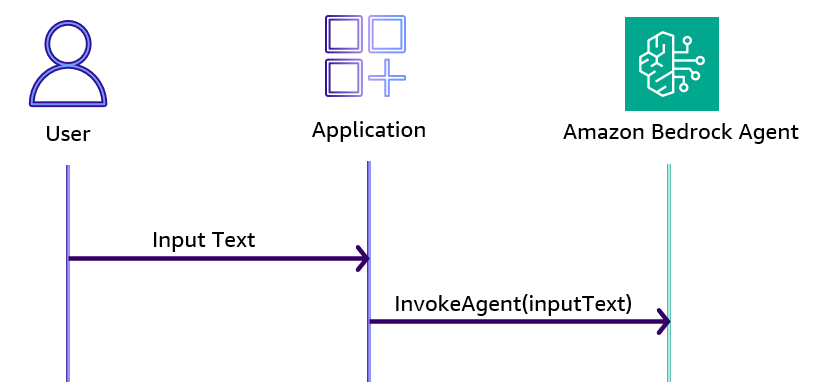

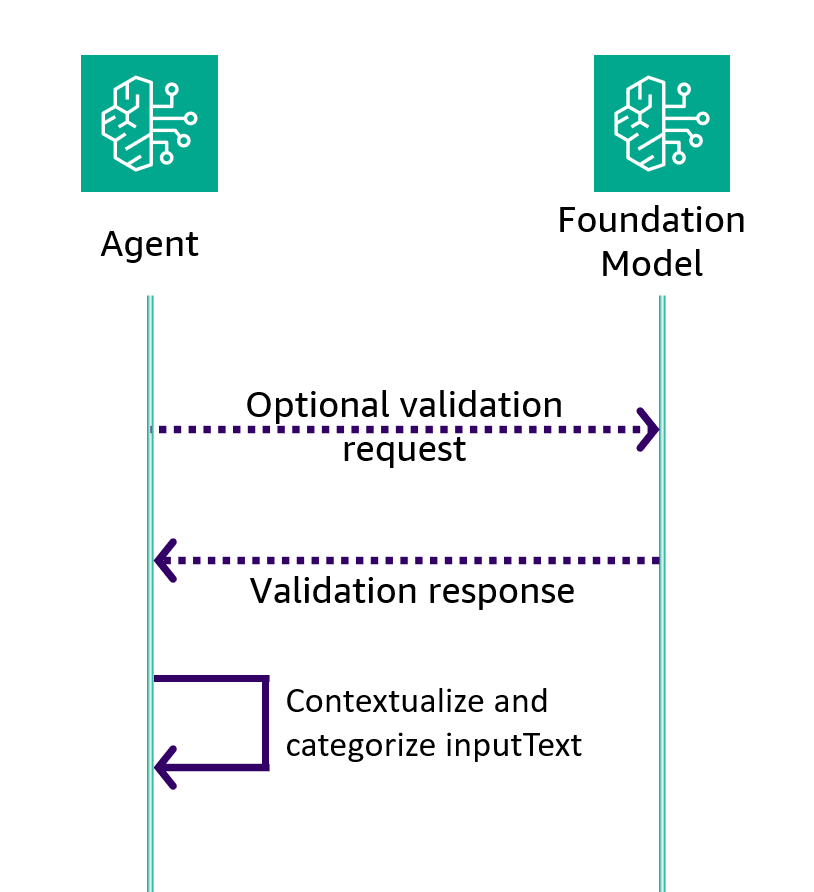

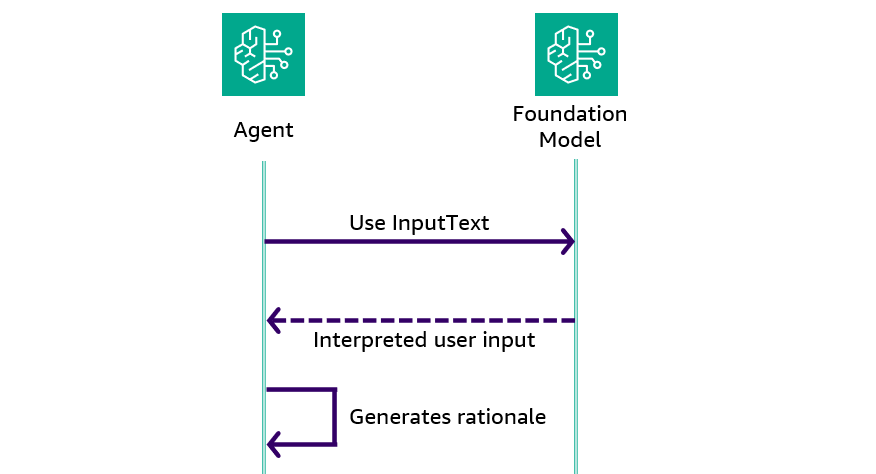

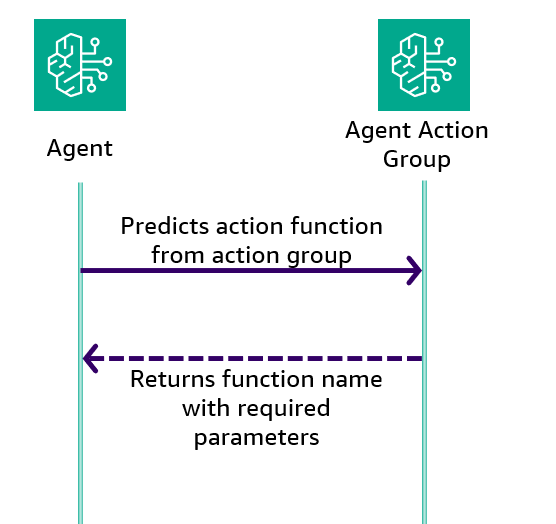

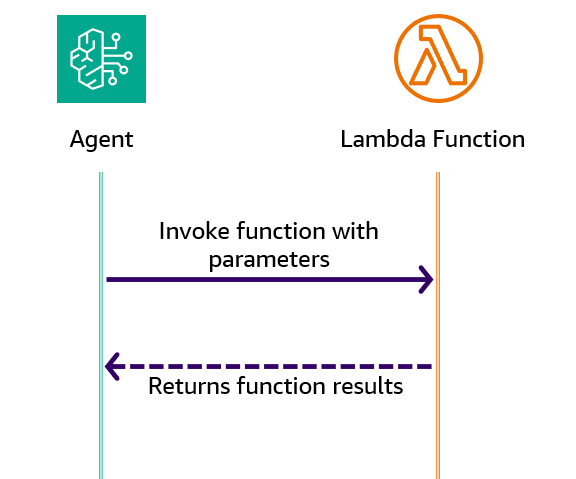

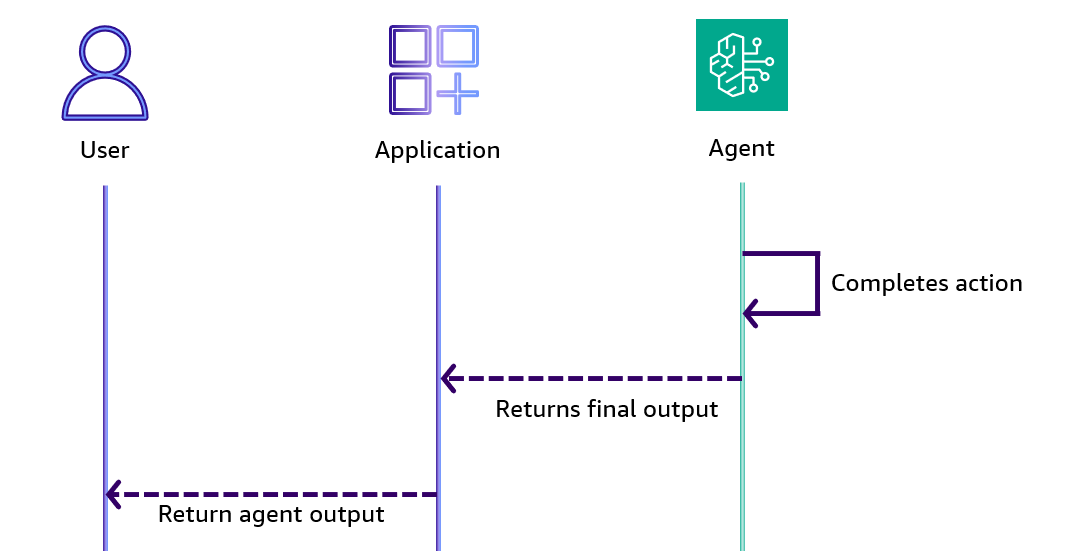

### **Implementing Return Control**

- **How It Works:**
  - The agent identifies an action that requires external execution.
  - Instead of invoking a Lambda function, the agent returns control to the application.
  - The application executes the action locally and returns results to the agent.

- **Steps in Return Control Flow:**

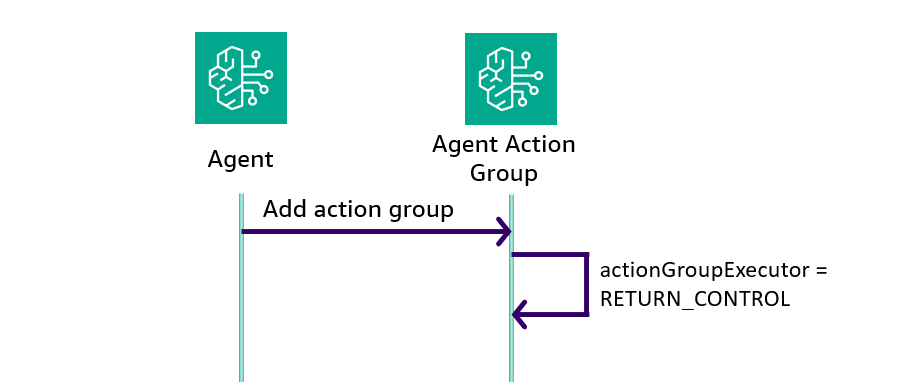

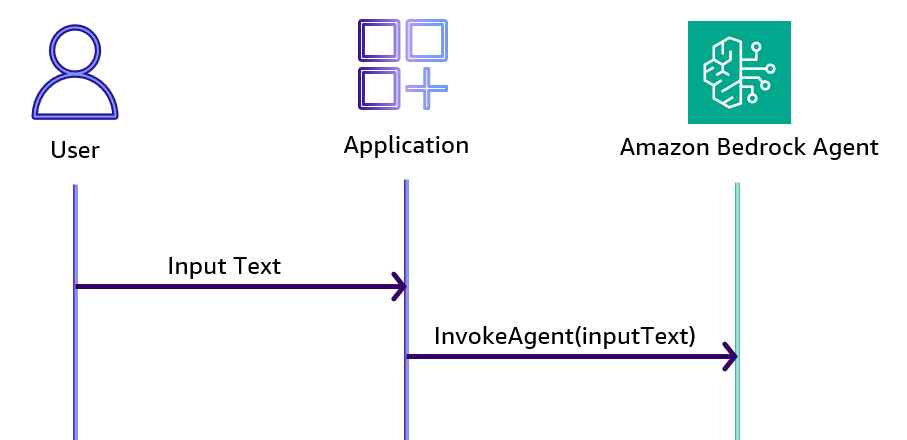

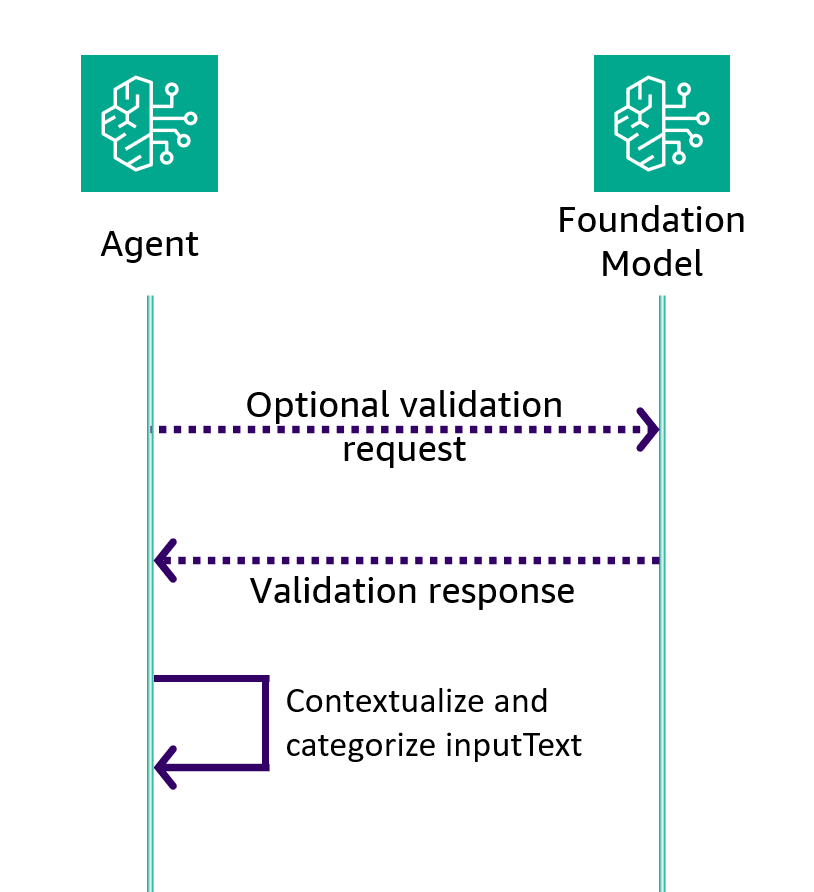

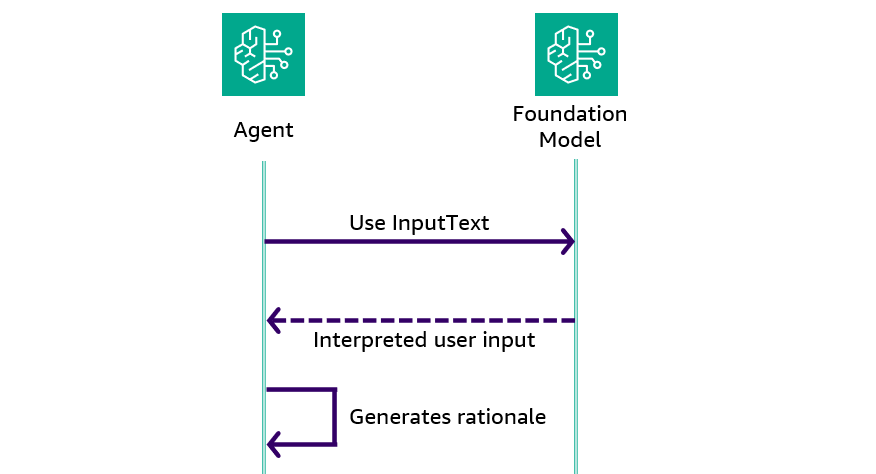

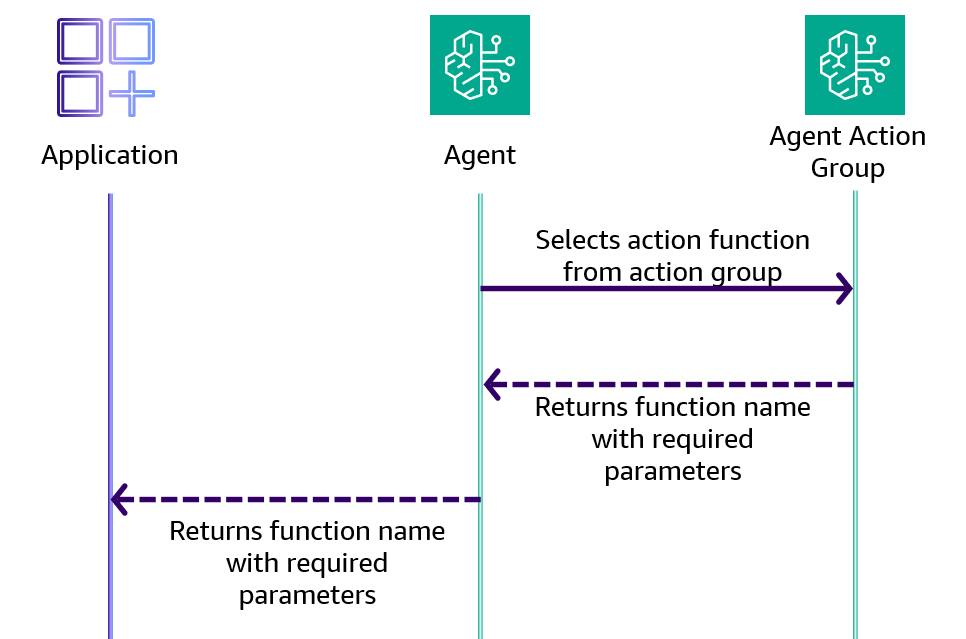

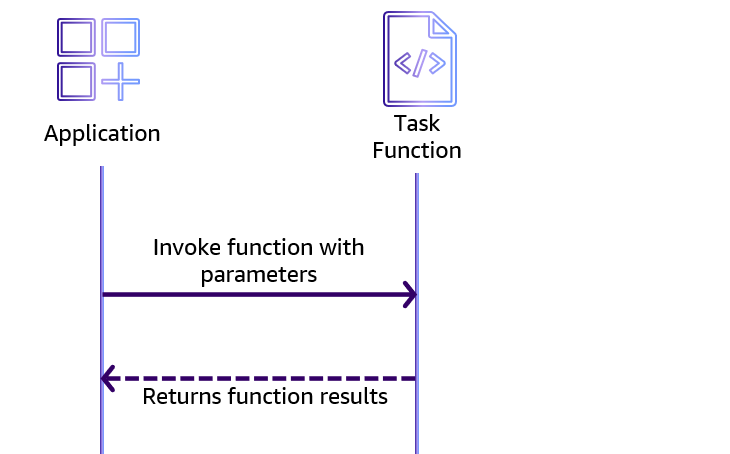

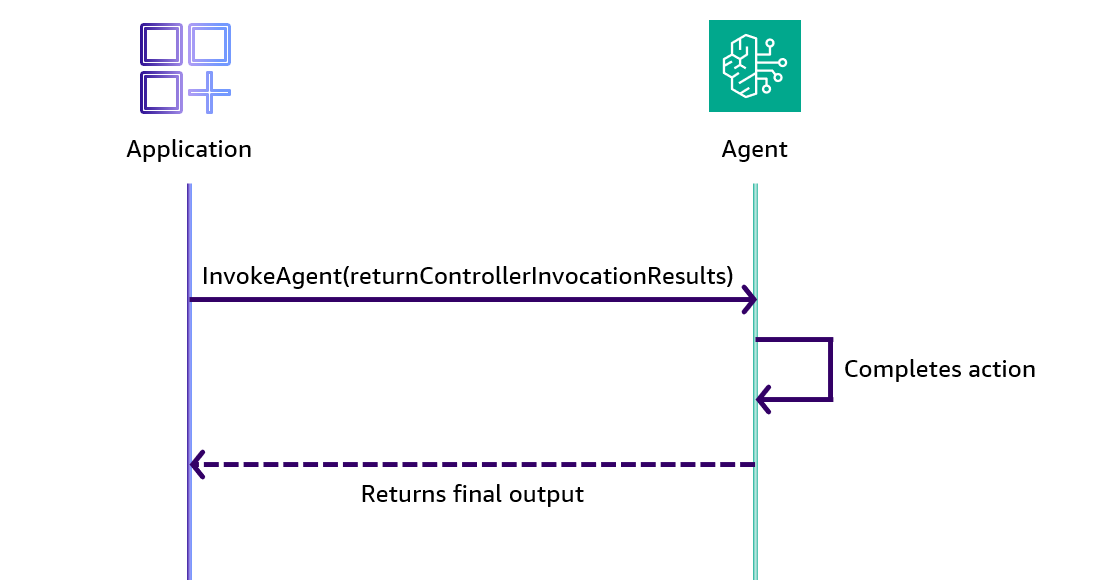

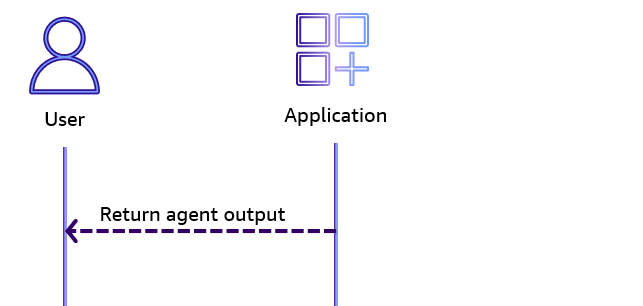

### **Key Takeaways**
**Invocation Method** |	**Description** |  **Best Use Case** <br>
Lambda Function |  Executes business logic using AWS Lambda. |  Automating actions without needing application-side execution. <br>
Return Control |  Returns execution control to the application. |  Running local functions or asynchronous workflows.